In [54]:
import os

os.getcwd()

'C:\\Users\\sdeep\\Documents\\trade'

In [55]:
%matplotlib inline

import numpy as np
import pandas as pd

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

In [56]:
df = pd.read_excel("yash_data.xlsx")
df.head()

,Code,Grade,Base_Location,Gender,Designation,Marital_Status,Employee_Status,DOB,Tenure,Age Group,...,Highly_Disagree,Disagree,Neutral,Agree,Highly_Agree,No_Response,Engaged,Passive,Disengaged,Score_Method
0,ID_0001,E1-Grade E1,401,13,Associate UI Specialist,16,18,1990-03-25,Y1,G2,...,0,0,3,35,8,4,43,3,0,0.9348
1,ID_0002,E2-Grade E2,501,13,Consultant,15,18,1982-09-06,Y12,G3,...,0,1,0,28,17,4,45,0,1,0.9783
2,ID_0003,E3-Grade E3,401,13,Module lead,15,18,1987-03-24,Y1,G3,...,0,0,0,0,0,50,0,0,0,No Participation
3,ID_0004,E1-Grade E1,401,14,Software Engineer,15,18,1989-04-10,Y1,G3,...,0,0,0,0,0,50,0,0,0,No Participation
4,ID_0005,E1-Grade E1,301,14,Technical Recruiter,15,18,1980-02-28,Y1020,G3,...,0,0,0,0,0,50,0,0,0,No Participation


In [57]:
df['Score_Method '].value_counts()

No Participation    160
1                    69
0.9783               66
0.9565               38
0.8913               32
                   ... 
0.1522                2
0.24                  1
0.08                  1
0.34                  1
0.38                  1
Name: Score_Method , Length: 86, dtype: int64

In [58]:
#Delete non respondednt rows - 160
df = df.drop(df[df['Score_Method ']=='No Participation'].index)

In [59]:
df.shape

(840, 73)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 999
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Code             840 non-null    object        
 1   Grade            840 non-null    object        
 2   Base_Location    840 non-null    int64         
 3   Gender           840 non-null    int64         
 4   Designation      840 non-null    object        
 5   Marital_Status   840 non-null    int64         
 6   Employee_Status  840 non-null    int64         
 7   DOB              840 non-null    datetime64[ns]
 8   Tenure           840 non-null    object        
 9   Age Group        840 non-null    object        
 10  YR1              840 non-null    object        
 11  YR2              840 non-null    object        
 12  YR3              840 non-null    object        
 13  YR4              840 non-null    object        
 14  YR5              840 non-null    object   

In [52]:
df.describe()

,Base_Location,Gender,Marital_Status,Employee_Status,Highly_Disagree,Disagree,Neutral,Agree,Highly_Agree,No_Response,Engaged,Passive,Disengaged
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,278.451190,13.213095,15.450000,18.026190,0.879762,2.538095,8.069048,23.890476,10.263095,4.359524,34.153571,8.069048,3.417857
std,130.719773,0.409738,0.500179,0.159797,2.683738,3.708827,8.026327,12.295717,11.662867,8.183199,12.053970,8.026327,5.332154
min,101.000000,13.000000,15.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202.000000,13.000000,15.000000,18.000000,0.000000,0.000000,1.000000,14.000000,1.000000,0.000000,28.000000,1.000000,0.000000
50%,202.000000,13.000000,15.000000,18.000000,0.000000,1.000000,6.000000,24.000000,6.000000,4.000000,37.000000,6.000000,1.000000
75%,401.000000,13.000000,16.000000,18.000000,1.000000,3.000000,13.000000,33.000000,16.000000,4.000000,44.000000,13.000000,4.000000
max,701.000000,14.000000,17.000000,19.000000,29.000000,24.000000,44.000000,50.000000,46.000000,50.000000,50.000000,44.000000,36.000000


In [61]:
df["Base_Location"].value_counts()

202    271
401    162
404     98
102     83
201     55
203     48
301     38
101     25
601     23
302     15
501     12
701     10
Name: Base_Location, dtype: int64

In [53]:
df.isnull().count()

Code             840
Grade            840
Base_Location    840
Gender           840
Designation      840
                ... 
No_Response      840
Engaged          840
Passive          840
Disengaged       840
Score_Method     840
Length: 73, dtype: int64

## Sentiment Analysis on Remarks

In [79]:
df["Remarks"].value_counts()

0                                                                                                             491
No Response                                                                                                    25
No                                                                                                             15
Nothing                                                                                                         9
None                                                                                                            9
                                                                                                             ... 
One of the Best company(YASH) I have worked so far.                                                             1
Thanks for conducting survey..                                                                                  1
Company is good. Employee satisfaction is good in regard of knowledge if you are assigne

In [80]:
#Calculating the Sentiment Polarity
polarity=[] # list which will contain the polarity of the comments
subjectivity=[] # list which will contain the subjectivity of the comments
for i in df['Remarks'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

In [81]:
#Adding the Sentiment Polarity column to the data
df['polarity']=polarity
df['subjectivity']=subjectivity

In [82]:
df.head()

,Code,Grade,Base_Location,Gender,Designation,Marital_Status,Employee_Status,DOB,Tenure,Age Group,...,Neutral,Agree,Highly_Agree,No_Response,Engaged,Passive,Disengaged,Score_Method,polarity,subjectivity
0,ID_0001,E1-Grade E1,401,13,Associate UI Specialist,16,18,1990-03-25,Y1,G2,...,3,35,8,4,43,3,0,0.9348,0.7,0.6
1,ID_0002,E2-Grade E2,501,13,Consultant,15,18,1982-09-06,Y12,G3,...,0,28,17,4,45,0,1,0.9783,0.0,0.0
5,ID_0006,E3-Grade E3,101,13,Sr. UI Specialist,15,18,1984-04-02,Y510,G3,...,2,31,12,4,43,2,1,0.9348,0.0,0.0
6,ID_0007,E2-Grade E2,202,13,Consultant,15,18,1983-08-21,Y510,G3,...,2,12,32,4,44,2,0,0.9565,0.8,1.0
7,ID_0008,E3-Grade E3,202,13,Tech Lead,15,18,1977-03-18,Y0,G4,...,0,46,0,4,46,0,0,1,0.0,0.0


In [83]:
#Displaying the POSITIVE Remarks
df[['Remarks','polarity','subjectivity']][df.polarity>0].head(10)

,Remarks,polarity,subjectivity
0,Everything Good.,0.700000,0.600000
6,Very much happy working with YASH. Thank you.,0.800000,1.000000
10,Yash is really good place to work . Also emplo...,0.418182,0.527273
11,I am lucky to be a part of Yash family. Compan...,0.429949,0.544646
21,Really YASH is great place to Work,0.500000,0.475000
27,Great learning and overall nice experience wor...,0.466667,0.583333
52,Overall its a nice place to work for.,0.300000,0.500000
55,"Fine, remaining fine.",0.416667,0.500000
80,Facilities needs to improve more.,0.500000,0.500000
85,Overall its good experience with Yash till now...,0.412500,0.325000


In [84]:
#Displaying the NEGATIVE comments
df[['Remarks','polarity','subjectivity']][df.polarity<0].head(10)
                                                                       

,Remarks,polarity,subjectivity
170,"For installation of required software, I chase...",-0.216667,0.466667
201,"No, best stuff delivered.",-0.500000,0.300000
251,I have been deployed at Mumbai location as a f...,-0.083333,0.083333
391,Overall Experience is not good.,-0.175000,0.300000
616,Yash Facility team must take care of urgent re...,-0.200000,0.100000
622,Surveys are hardly making a change,-0.291667,0.541667
691,facilities team should have there email Id and...,-0.066667,0.508333
809,Need proper planning before hiring candidate i...,-0.083333,0.083333
841,I Have been asking for transfer of location fo...,-0.218750,0.375000
890,"Communication with yash is painful process, to...",-0.700000,0.900000


# Most Frequent Keywords used in Positive Remarks

In [107]:
from wordcloud import WordCloud

def wc(df,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(df))
    plt.imshow(wc)
    plt.axis('off')

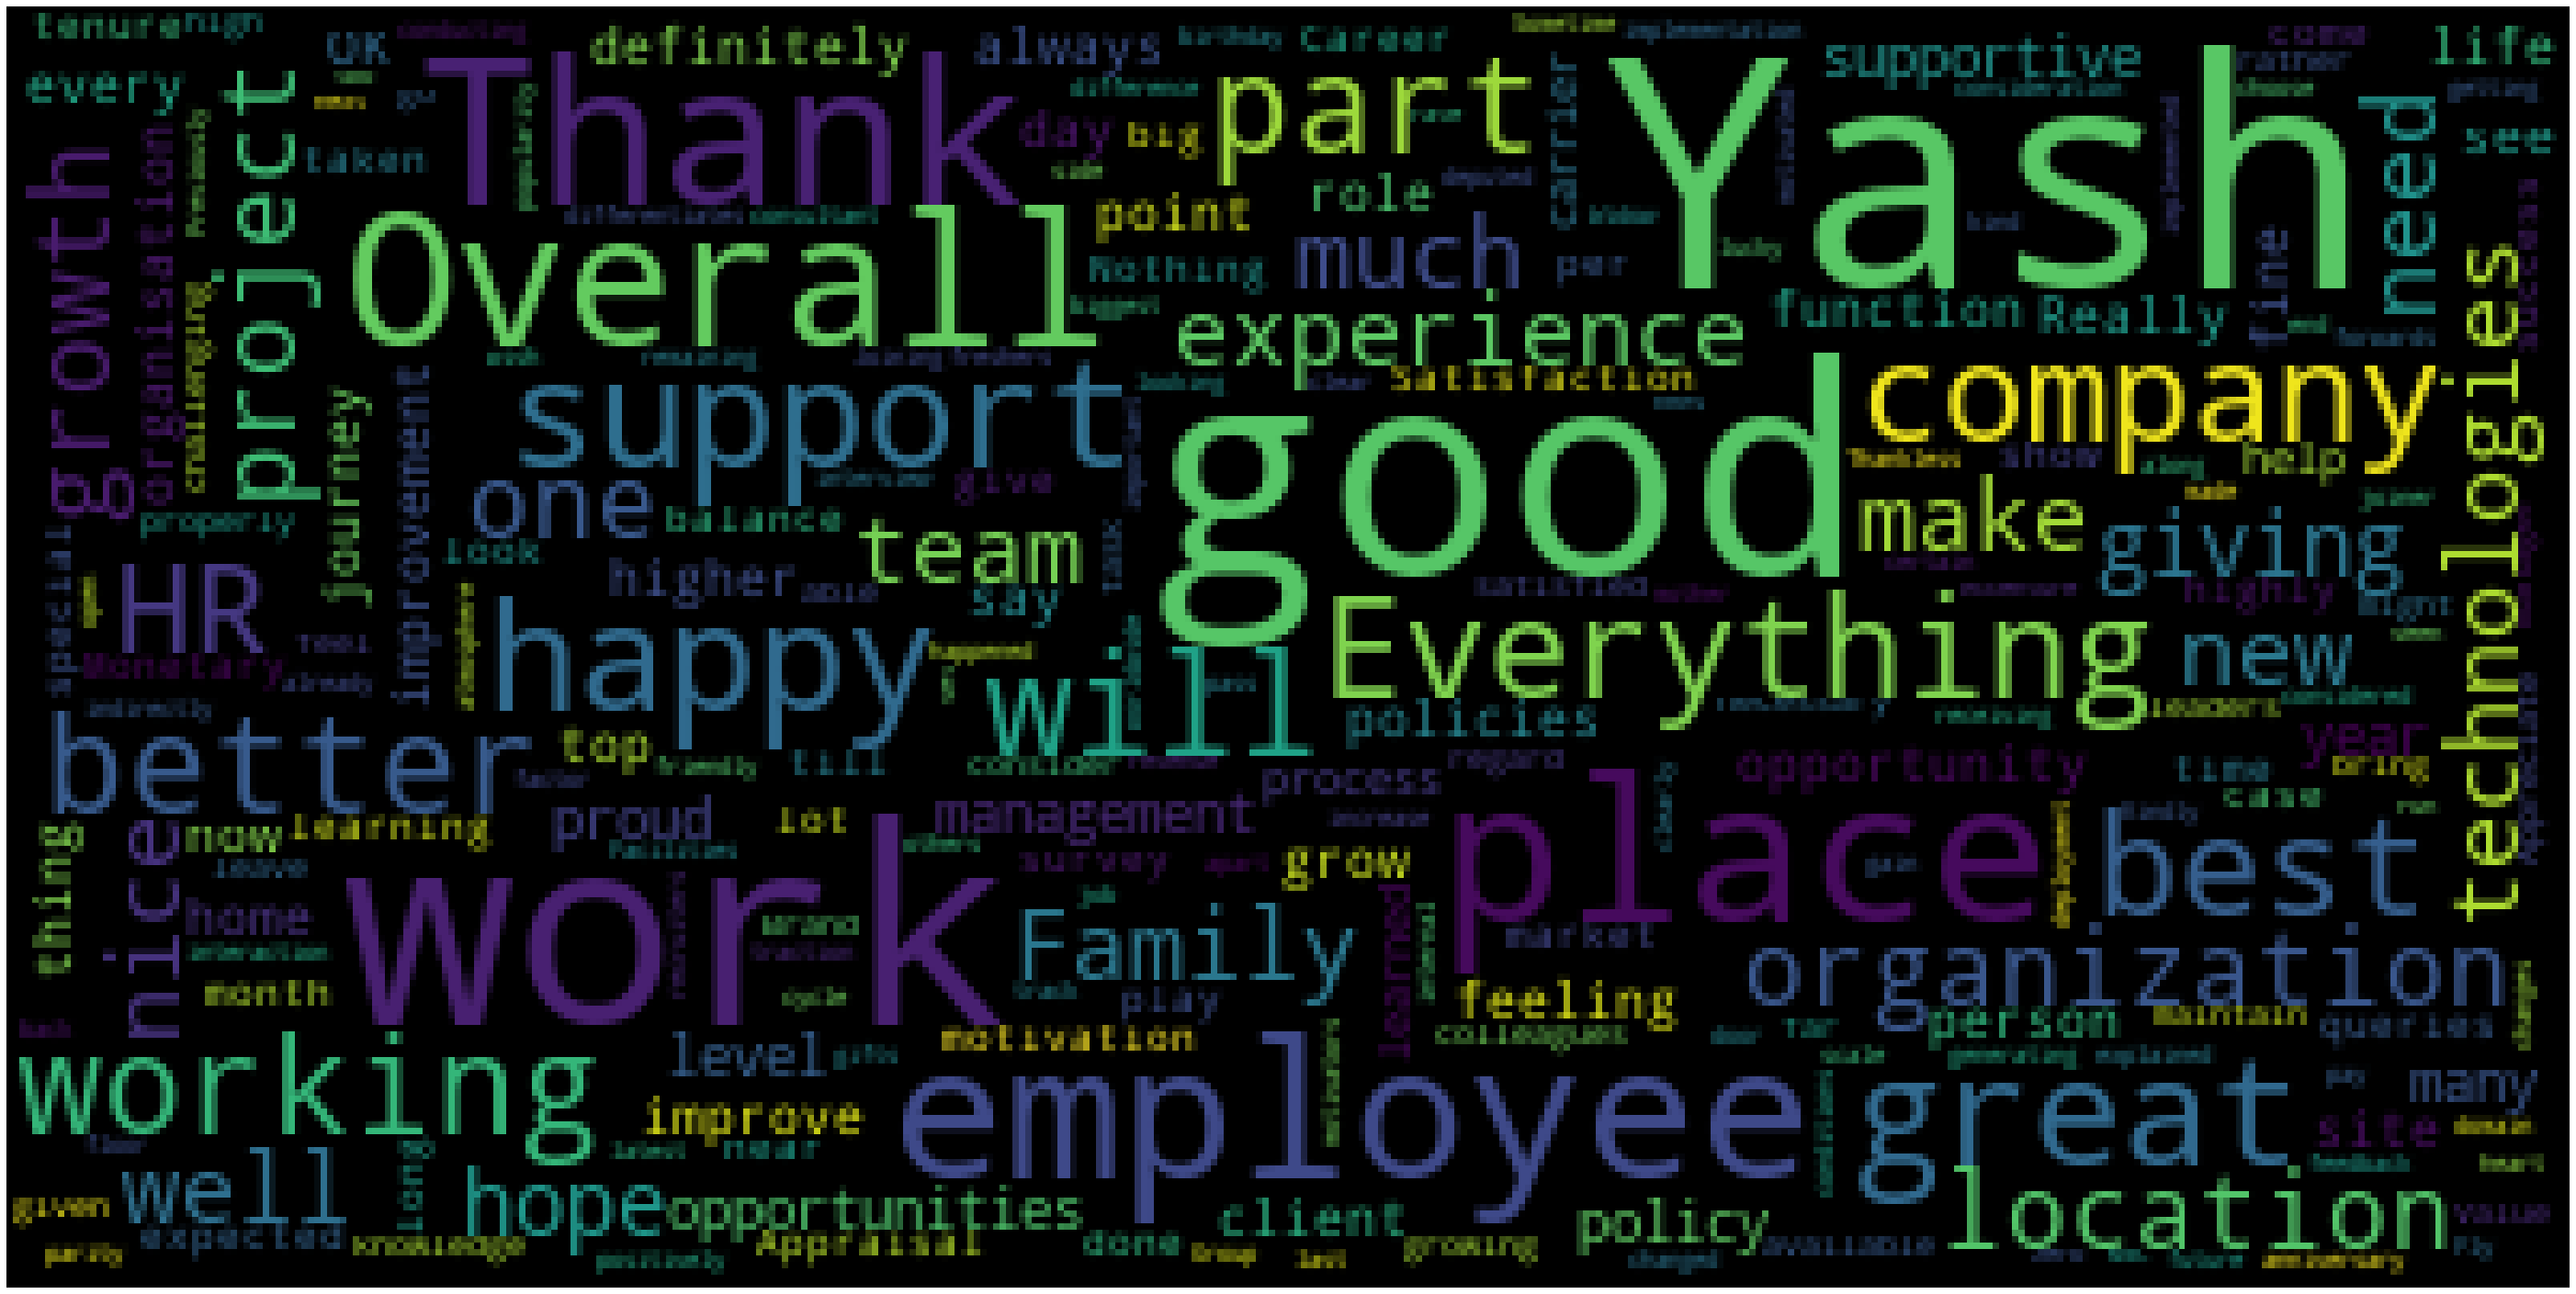

In [104]:
wc(df['Remarks'][df.polarity>0.8],'black','Common Words' )

# Most Frequent Keywords used in Negative Remarks

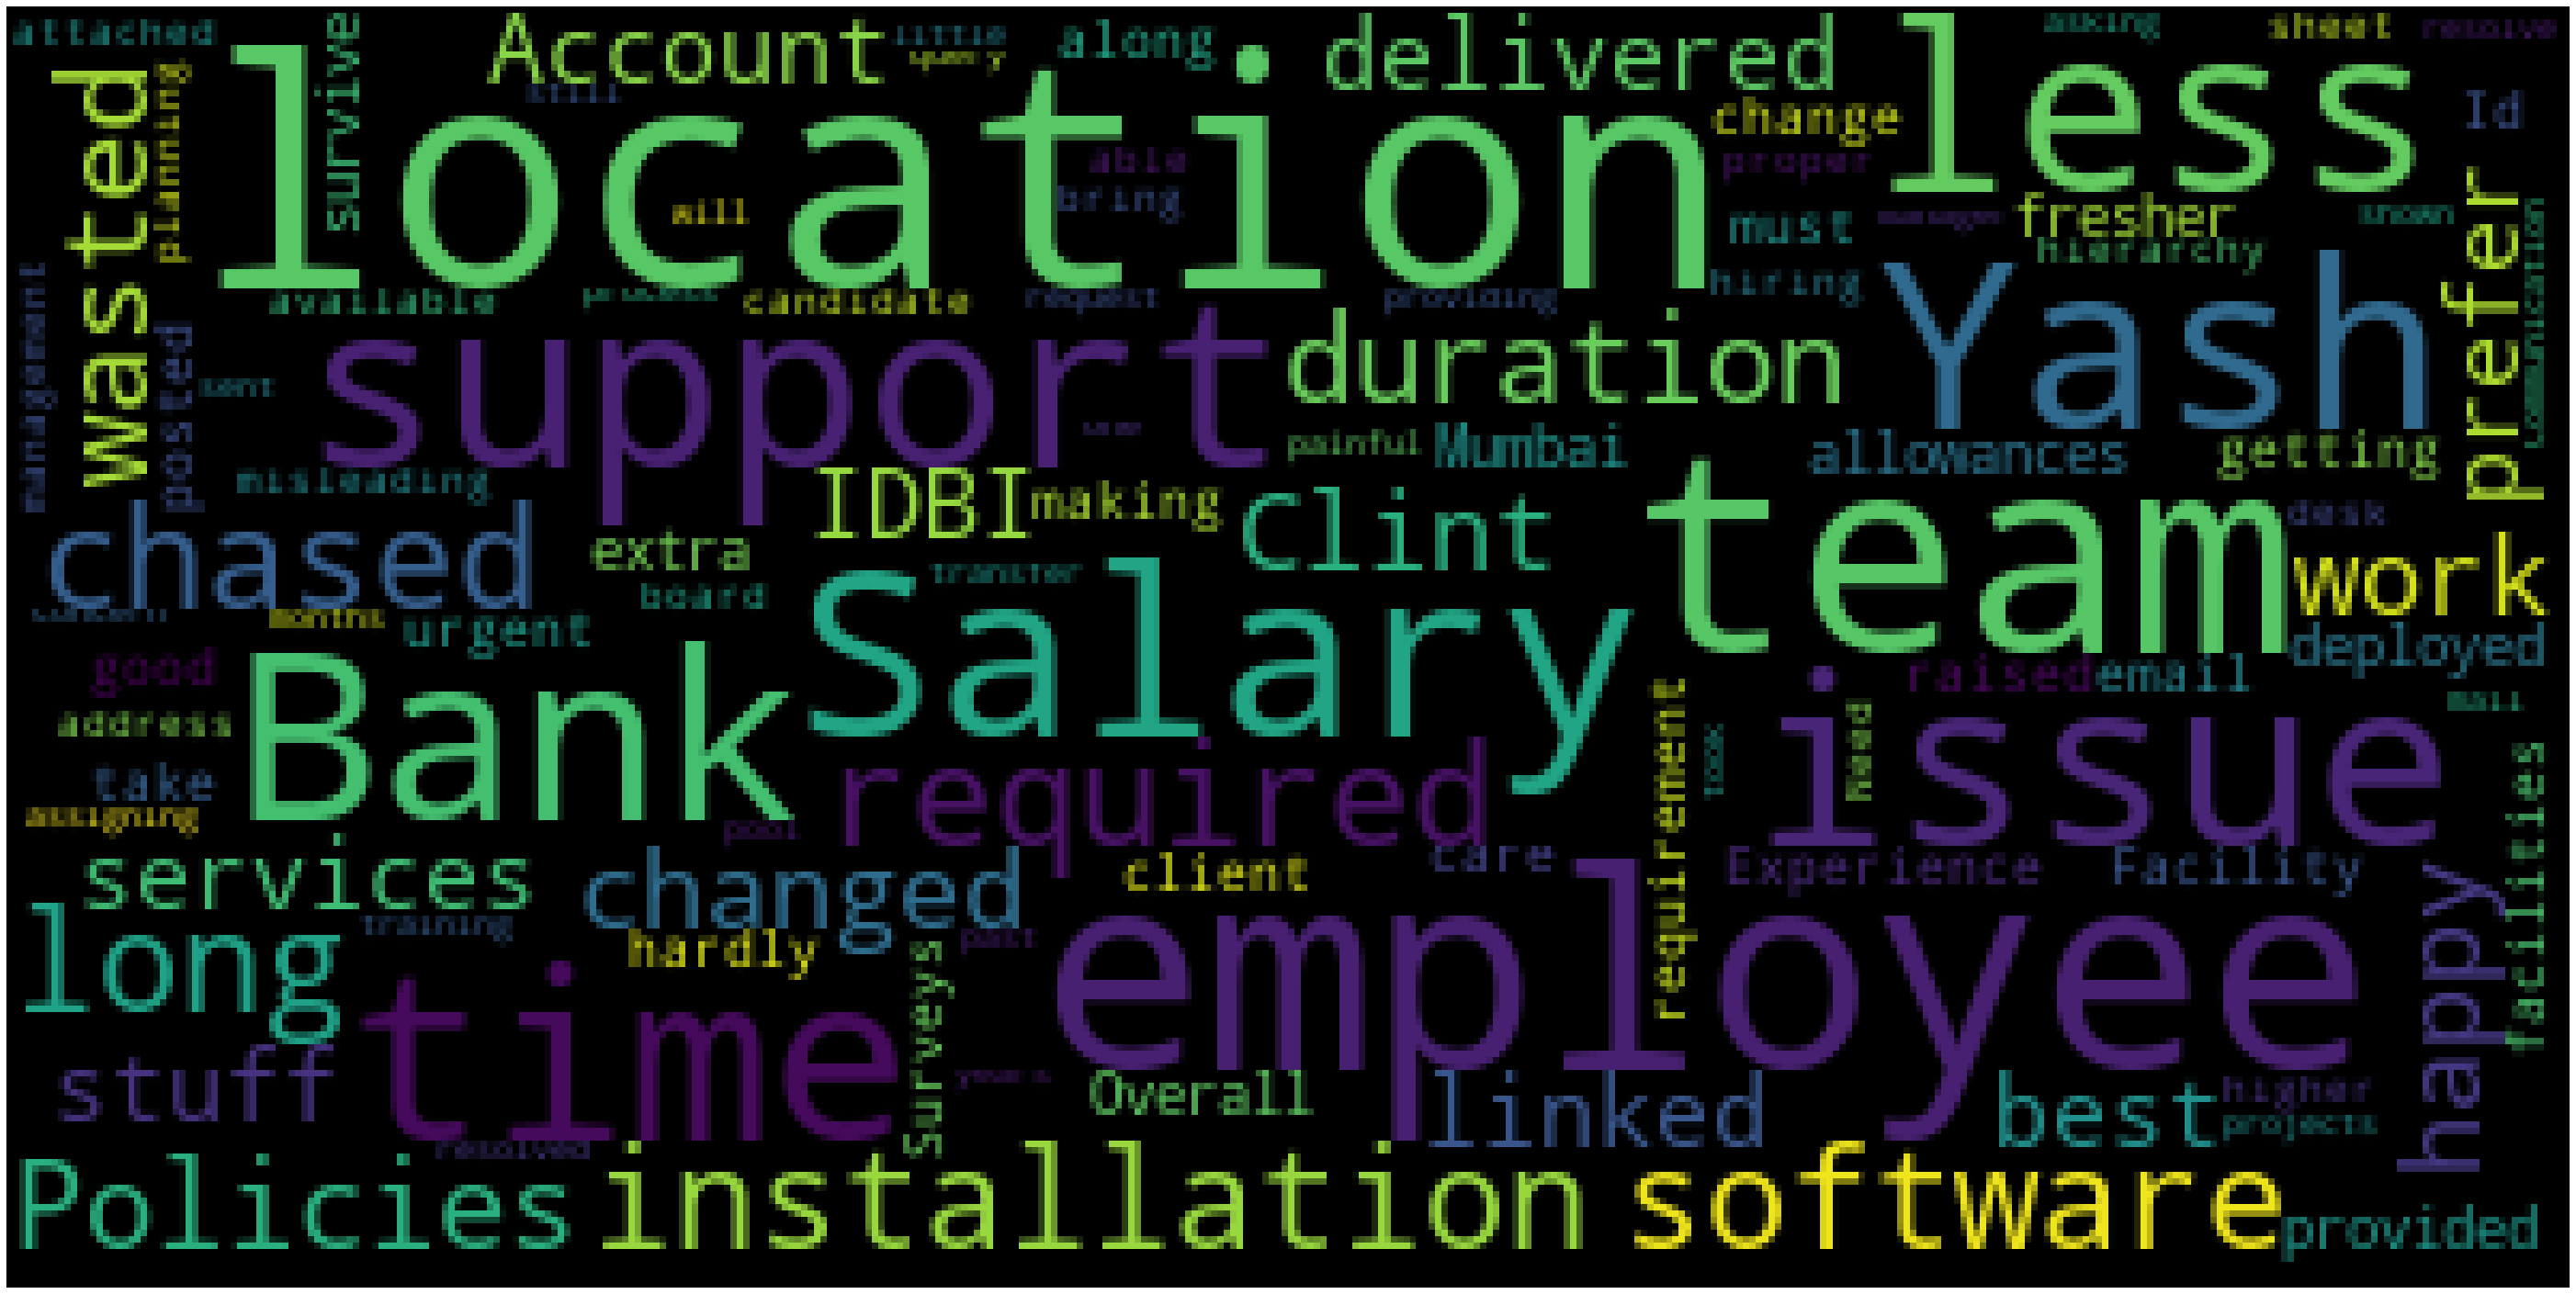

In [106]:
wc(df['Remarks'][df.polarity<0],'black','Common Words' )

# Calculating the count of Positive, Negative & Neutral Remarks

In [100]:
#Converting the polarity values from continuous to categorical
df['polarity'][df.polarity==0]= 0
df['polarity'][df.polarity > 0]= 1
df['polarity'][df.polarity < 0]= -1

 0.0    716
 1.0    114
-1.0     10
Name: polarity, dtype: int64

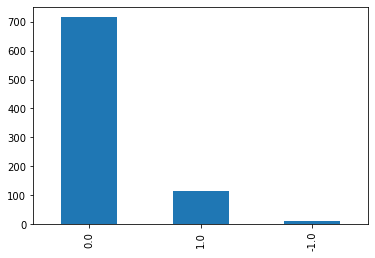

In [101]:
df.polarity.value_counts().plot.bar()
df.polarity.value_counts()

## 85.2% Employees Reviewed Positve 

## 13.5% Employees Reviewed Neutral

## 1.3% Employees Reviewed Negative